In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import unidecode

In [2]:
df = pd.read_csv('../data/forbes_2000_all_in_one_original.csv')

In [7]:
len(df.continent.unique())

7

In [3]:
df.year.value_counts().sort_index()

2008    2000
2009    2000
2010    2000
2011    2000
2012    2000
2013    2000
2014    2000
2015    2001
2016    2001
2017    2000
2018    1996
2019    2000
2020    2000
Name: year, dtype: int64

In [4]:
df.industry.value_counts().sort_index()

Advertising             79
Aerospace & Defense    277
Air Courier             65
Airline                271
Aluminum                74
                      ... 
Tobacco                124
Trading Companies      211
Transportation          58
Trucking                49
Utilities               56
Name: industry, Length: 112, dtype: int64

In [5]:
df.continent.value_counts().sort_index()

Africa            286
Asia             9986
Australia         522
Europe           6168
North America    8436
South America     580
Name: continent, dtype: int64

In [6]:
df.country.value_counts().sort_index()

Argentina                        13
Australia                       517
Australia/United Kingdom          3
Austria                         131
Bahrain                          21
                               ... 
United Kingdom/Netherlands        3
United Kingdom/South Africa       6
United States                  7295
Venezuela                        28
Vietnam                          26
Name: country, Length: 87, dtype: int64

In [7]:
df.sector.value_counts().sort_index()

Consumer Discretionary            3078
Consumer Staples                  1646
Diversified Media                    4
Energy                            1261
Financials                        6884
Health Care                       1084
Industrials                       3045
Information Technology            1550
Materials                         2151
Precision Healthcare Equipment      20
Telecommunication Services         669
Utilities                         1256
Name: sector, dtype: int64

In [8]:
df.is_top_500.value_counts().sort_index()

False    19497
True      6501
Name: is_top_500, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25998 entries, 0 to 25997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           25998 non-null  object 
 1   industry          25665 non-null  object 
 2   country           25998 non-null  object 
 3   market_value      25993 non-null  float64
 4   profits           25989 non-null  float64
 5   assets            25983 non-null  float64
 6   sales             25987 non-null  float64
 7   rank              25998 non-null  int64  
 8   year              25998 non-null  int64  
 9   profits_%_assets  25974 non-null  float64
 10  profits_%_sales   25975 non-null  float64
 11  forbes_webpage    24928 non-null  object 
 12  sector            22648 non-null  object 
 13  continent         25978 non-null  object 
 14  headquarters      22174 non-null  object 
 15  state             6517 non-null   object 
 16  ceo               22162 non-null  object

In [10]:
# NAN by column
df.isnull().sum(axis = 0)

company                 0
industry              333
country                 0
market_value            5
profits                 9
assets                 15
sales                  11
rank                    0
year                    0
profits_%_assets       24
profits_%_sales        23
forbes_webpage       1070
sector               3350
continent              20
headquarters         3824
state               19481
ceo                  3836
is_top_500              0
dtype: int64

In [11]:
analysis_features = [
    'company',
    'industry',
    'sector',
    'country',
    'continent',
    'market_value',
    'profits',
    'assets',
    'sales',
    'rank',
    'year',
    'profits_%_assets',
    'profits_%_sales',
    'is_top_500'
]

In [12]:
# DROP nan on columns because it is hard to input values for ranked data
analysis_df = df[analysis_features]
original_rows = len(analysis_df.index)

analysis_df = analysis_df.replace([np.inf, -np.inf], np.nan).dropna()
dropped_rows = len(analysis_df.index)

print(f'Dropped rows {original_rows - dropped_rows}')

Dropped rows 3476


In [13]:
# Check nan counts
analysis_df.isnull().sum(axis=0)

company             0
industry            0
sector              0
country             0
continent           0
market_value        0
profits             0
assets              0
sales               0
rank                0
year                0
profits_%_assets    0
profits_%_sales     0
is_top_500          0
dtype: int64

In [14]:
# Check ranked companies by year
companies_by_year = analysis_df.groupby('year').size().reset_index(name='count')
companies_by_year

,year,count
0,2008,1257
1,2009,1333
2,2010,1389
3,2011,1525
4,2012,1627
5,2013,1775
6,2014,1971
7,2015,1974
8,2016,1969
9,2017,1992


In [15]:
categorical = ['year','continent','country','industry']

# Categorical Columns Stats
categorical_stats = analysis_df.groupby(categorical)\
    .size()\
    .reset_index(name='count')
categorical_stats

,year,continent,country,industry,count
0,2008,Africa,Morocco,Regional Banks,1
1,2008,Africa,South Africa,Broadcasting & Cable,1
2,2008,Africa,South Africa,Conglomerates,3
3,2008,Africa,South Africa,Diversified Chemicals,1
4,2008,Africa,South Africa,Investment Services,1
...,...,...,...,...,...
8859,2020,South America,Colombia,Investment Services,1
8860,2020,South America,Colombia,Oil & Gas Operations,1
8861,2020,South America,Colombia,Regional Banks,2
8862,2020,South America,Peru,Regional Banks,1


In [16]:
# Ordinal Columns: rank & year
# Categorical Columns: industry, country, continent
# Numerical Columns: market_value, profits, assets, sales, profits_%_assets, profits_%_sales

In [17]:
analysis_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
market_value,22522.0,23.117801,46.620692,0.000000,5.600500,10.953000,22.58800,1684.800000
profits,22522.0,6.341124,19.512226,-58.300000,0.450325,1.100000,4.50000,470.200000
assets,22522.0,62.931094,235.202799,-71.970000,2.200000,12.995000,37.43700,4322.500000
sales,22522.0,36.423436,142.866804,-22.730000,5.300000,11.427500,25.64675,3226.200000
rank,22522.0,957.189237,567.718253,1.000000,466.000000,940.000000,1437.00000,2000.000000
year,22522.0,2014.484637,3.589977,2008.000000,2012.000000,2015.000000,2018.00000,2020.000000
profits_%_assets,22522.0,6.081066,78.008562,-3414.634146,0.014334,0.055232,2.20000,8166.666667
profits_%_sales,22522.0,0.423382,10.710629,-66.872727,0.047755,0.121141,0.30000,1519.900000


In [18]:
# Duplicate analysis
duplicated = analysis_df[analysis_df.duplicated()]
duplicated

,company,industry,sector,country,continent,market_value,profits,assets,sales,rank,year,profits_%_assets,profits_%_sales,is_top_500


In [19]:
analysis_df['cost'] = analysis_df.sales - analysis_df.profits

In [20]:
for industry in sorted(analysis_df.industry.unique()):
    lower_case = unidecode.unidecode(
        str(industry)
            .lower()
            .strip()
        .replace(' ','_')
        .replace('&','_')
        .replace('/','_')
        .replace('-','_')
        .replace(',','_')
        .replace('___','_')
        .replace('__','_')
    )
    analysis_df.loc[df.industry == industry, 'industry'] = lower_case


In [21]:
for sector in sorted(analysis_df.sector.unique()):
    lower_case = unidecode.unidecode(
        str(sector)
            .lower()
            .strip()
        .replace(' ','_')
        .replace('&','_')
        .replace('/','_')
        .replace('-','_')
        .replace(',','_')
        .replace('___','_')
        .replace('__','_')
    )
    analysis_df.loc[df.sector == sector, 'sector'] = lower_case


In [22]:
for continent in sorted(analysis_df.continent.unique()):
    lower_case = unidecode.unidecode(
        str(continent)
            .lower()
            .strip()
        .replace(' ','_')
        .replace('&','_')
        .replace('/','_')
        .replace('-','_')
        .replace(',','_')
        .replace('___','_')
        .replace('__','_')
    )
    analysis_df.loc[df.continent == continent, 'continent'] = lower_case#%%

In [23]:
for country in sorted(analysis_df.country.unique()):
    lower_case = unidecode.unidecode(
        str(country)
            .lower()
            .strip()
        .replace(' ','_')
        .replace('&','_')
        .replace('/','_')
        .replace('-','_')
        .replace(',','_')
        .replace('___','_')
        .replace('__','_')
    )

    analysis_df.loc[df.country == country, 'country'] = lower_case

In [24]:
# Analizamos nuestras variables numericas y ploteamos boxplots de las mismas agrupadas por año
numeric = [
    'market_value',
    'profits',
    'assets',
    'sales',
    'cost'
]
numeric_data = analysis_df[numeric]
numeric_data

,market_value,profits,assets,sales,cost
0,180.81,19.1300,2348.98,146.500,127.3700
1,330.93,22.2100,795.34,172.740,150.5300
2,176.53,14.9800,1715.75,119.190,104.2100
3,136.88,15.3700,1562.15,116.350,100.9800
4,465.51,40.6100,242.08,358.600,317.9900
...,...,...,...,...,...
25989,5.00,0.1377,12.70,11.400,11.2623
25990,3.30,-0.3663,10.10,12.900,13.2663
25992,6.90,0.2400,23.50,4.000,3.7600
25993,8.30,0.1147,18.60,1.400,1.2853


In [25]:
def boxplot(df, col: str):
    # Look for outliers
    sns.boxplot(
        x='year',
        y=f'{col}',
        data=df
    )
    # Add titles
    plt.title(
        f'Boxplots for {col} by year',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.ylabel('$usd billions')
    plt.show()

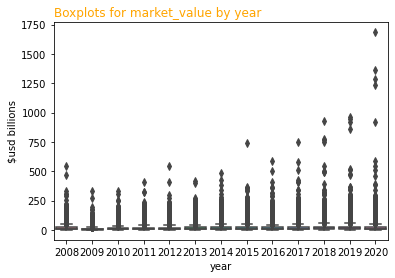

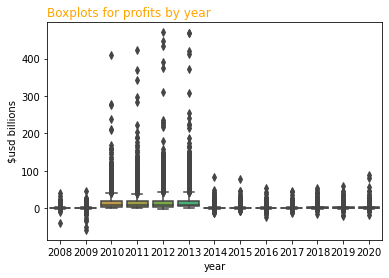

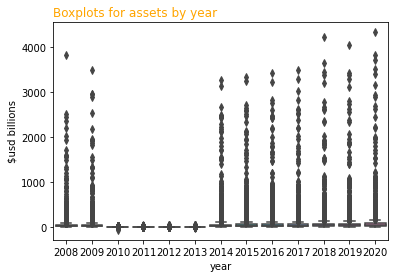

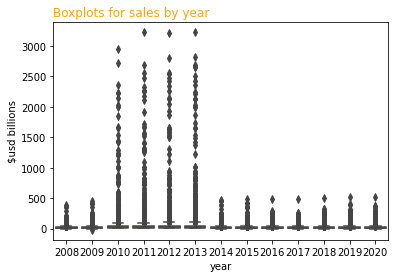

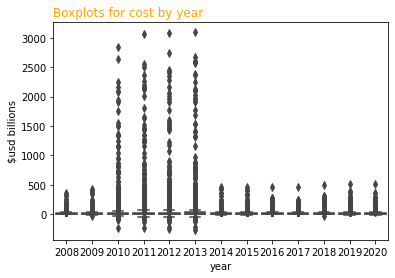

In [26]:
for col in numeric:
    boxplot(analysis_df, col)

In [27]:
def get_outlier_limits(col: str):
    iqr_multiplier = 1.5
    iqr = stats.iqr(numeric_data[col])
    upper_limit = iqr * iqr_multiplier + numeric_data[col].quantile(.75)
    lower_limit =  numeric_data[col].quantile(.25) - iqr * iqr_multiplier

    return {
        'metric': col,
        'iqr': iqr,
        'upper_limit': upper_limit,
        'lower_limit': lower_limit,
    }

In [28]:
outlier_cols = ['market_value', 'profits', 'sales', 'assets', 'cost']

In [29]:
# We analyze skewness in original data
numeric_data[outlier_cols].skew().sort_values(ascending=False)

cost            13.045228
sales           12.691019
market_value    10.619463
profits          9.997455
assets           8.986376
dtype: float64

In [30]:
# We analyze kurtosis in original data
numeric_data[outlier_cols].kurtosis().sort_values(ascending=False)

market_value    215.745460
cost            204.238477
sales           194.865752
profits         159.128462
assets           99.402838
dtype: float64

In [31]:
# We calculate uni-variate IQR range limits for our outlier columns
limits = pd.DataFrame(
    map(lambda x: get_outlier_limits(x), outlier_cols)
)
limits

,metric,iqr,upper_limit,lower_limit
0,market_value,16.987500,48.069250,-19.880750
1,profits,4.049675,10.574512,-5.624187
2,sales,20.346750,56.166875,-25.220125
3,assets,35.237000,90.292500,-50.655500
4,cost,17.168525,45.783538,-22.890563


In [32]:
# IQR RANGE OUTLIER REMOVAL
clean_outlier_data = numeric_data[outlier_cols]
rows = len(clean_outlier_data.index)
for col in outlier_cols:
    upper_limit = float(limits.loc[limits['metric'] == col].upper_limit.values[0])
    lower_limit = float(limits.loc[limits['metric'] == col].lower_limit.values[0])
    clean_outlier_data = clean_outlier_data[clean_outlier_data[col].between(lower_limit,upper_limit)]

removed = len(clean_outlier_data.index)

print(f'original rows -> {rows}')
print(f'{rows - removed} outiers removed')
print(f'Outlier Clean Percentage -> {removed / rows} %')

original rows -> 22522
7026 outiers removed
Outlier Clean Percentage -> 0.6880383624900097 %


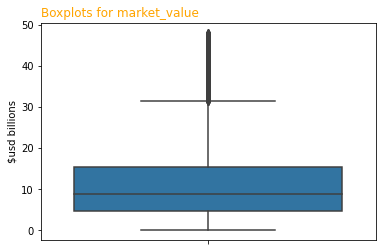

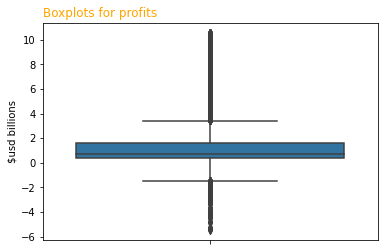

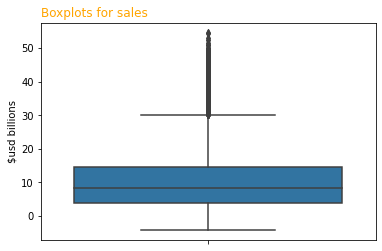

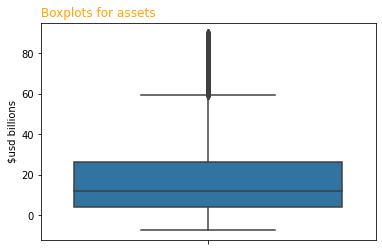

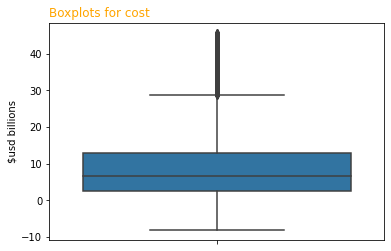

In [33]:
# Boxplot for columns after outlier removal
for col in outlier_cols:
    # Look for outliers
    sns.boxplot(
        y=f'{col}',
        data=clean_outlier_data
    )
    # Add titles
    plt.title(
        f'Boxplots for {col}',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.ylabel('$usd billions')
    plt.show()

/Users/francotestori/dsuba/tesis_01/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


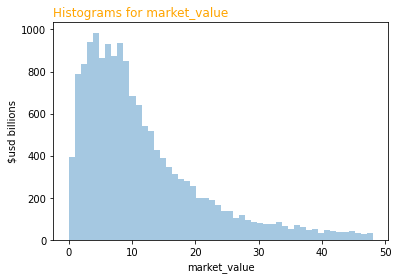

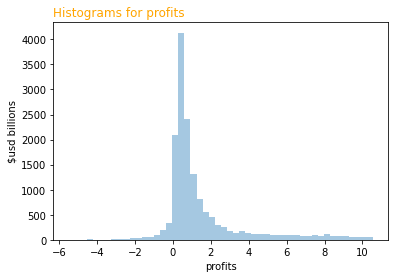

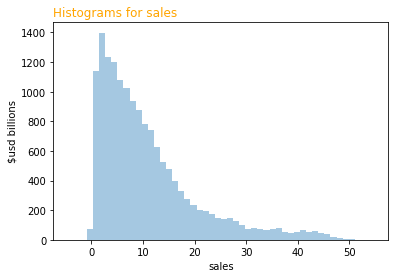

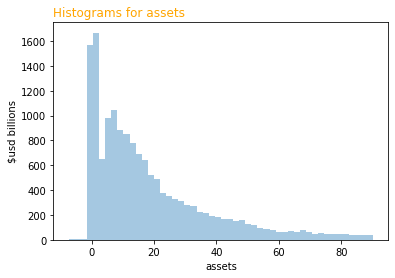

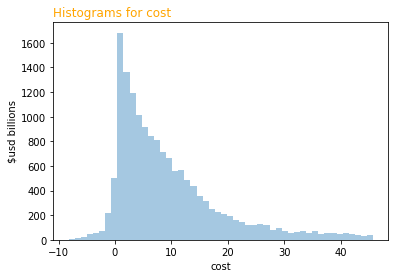

In [34]:
# Histograms for columns after outlier removal
for col in outlier_cols:
    sns.distplot(
        a=clean_outlier_data[col],
        hist=True,
        kde=False,
        rug=False
    )
    # Add titles
    plt.title(
        f'Histograms for {col}',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.ylabel('$usd billions')
    plt.show()

In [35]:
# Skewness for columns after outlier removal
clean_outlier_data.skew().sort_values(ascending=False)

profits         2.112895
sales           1.553465
cost            1.505963
assets          1.466156
market_value    1.455184
dtype: float64

In [36]:
# We analyze kurtosis in original data
clean_outlier_data.kurtosis().sort_values(ascending=False)

profits         4.399601
sales           2.338177
cost            2.181557
market_value    1.974426
assets          1.814899
dtype: float64

In [37]:
# Z-SCORE OUTLIER REMOVAL
clean_outlier_data = numeric_data[outlier_cols]
rows = len(clean_outlier_data.index)
clean_outlier_data = clean_outlier_data[(np.abs(stats.zscore(clean_outlier_data)) < 3).all(axis=1)]
removed = len(clean_outlier_data.index)

print(f'original rows -> {rows}')
print(f'{rows - removed} outiers removed')
print(f'Outlier Cleanage Percentage -> {removed / rows} %')

original rows -> 22522
1130 outiers removed
Outlier Cleanage Percentage -> 0.9498268359825948 %


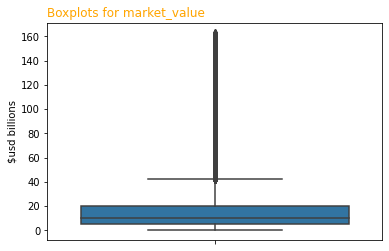

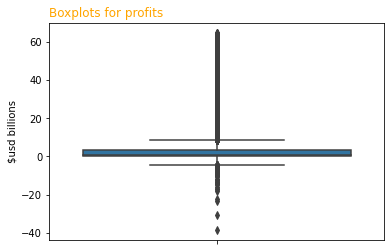

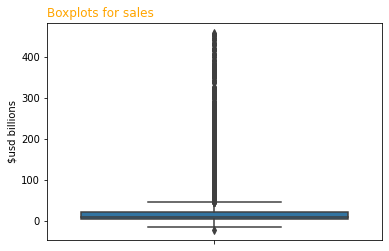

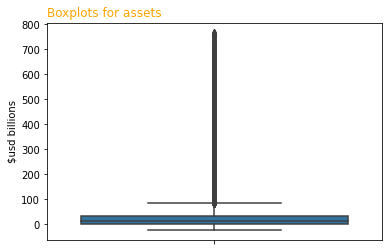

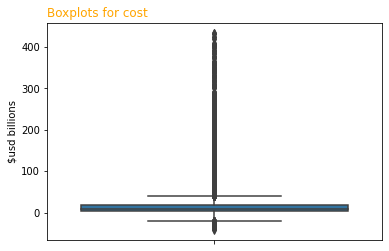

In [38]:
# Boxplot for columns after outlier removal
for col in outlier_cols:
    # Look for outliers
    sns.boxplot(
        y=f'{col}',
        data=clean_outlier_data
    )
    # Add titles
    plt.title(
        f'Boxplots for {col}',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.ylabel('$usd billions')
    plt.show()

/Users/francotestori/dsuba/tesis_01/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


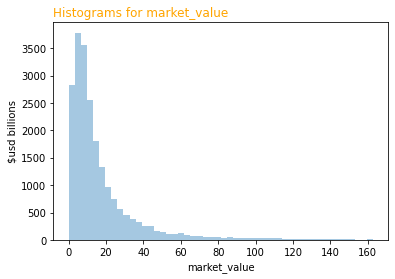

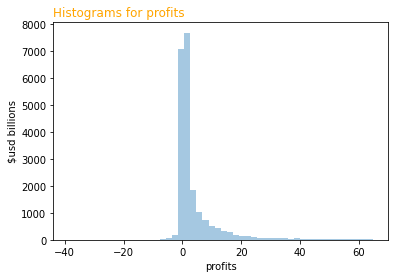

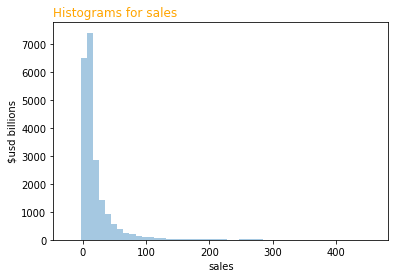

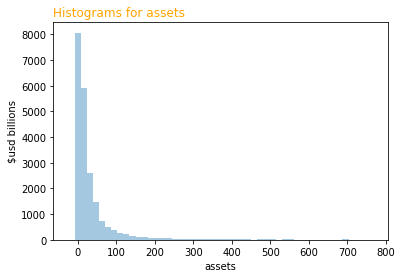

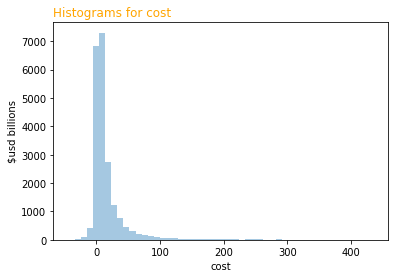

In [39]:
# Histograms for columns after outlier removal
for col in outlier_cols:
    sns.distplot(
        a=clean_outlier_data[col],
        hist=True,
        kde=False,
        rug=False
    )
    # Add titles
    plt.title(
        f'Histograms for {col}',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.ylabel('$usd billions')
    plt.show()

In [40]:
# Skewness for columns after outlier removal
clean_outlier_data.skew().sort_values(ascending=False)


cost            5.493223
sales           5.450305
assets          4.896213
profits         3.667605
market_value    3.082946
dtype: float64

In [41]:
# We analyze kurtosis in original data
clean_outlier_data.kurtosis().sort_values(ascending=False)

cost            41.432337
sales           40.987979
assets          29.439753
profits         16.586994
market_value    11.898919
dtype: float64

In [42]:
zscore_df = numeric_data[(np.abs(stats.zscore(numeric_data)) < 3).all(axis=1)]
zscore_df

,market_value,profits,assets,sales,cost
21,129.15,11.8900,177.76,171.500,159.6100
26,126.22,9.8600,200.84,94.040,84.1800
33,138.42,13.0000,143.13,82.400,69.4000
35,90.23,5.6400,210.88,149.000,143.3600
36,157.62,10.4200,120.43,98.790,88.3700
...,...,...,...,...,...
25989,5.00,0.1377,12.70,11.400,11.2623
25990,3.30,-0.3663,10.10,12.900,13.2663
25992,6.90,0.2400,23.50,4.000,3.7600
25993,8.30,0.1147,18.60,1.400,1.2853


In [43]:
iqr_df = numeric_data
for col in outlier_cols:
    upper_limit = float(limits.loc[limits['metric'] == col].upper_limit.values[0])
    lower_limit = float(limits.loc[limits['metric'] == col].lower_limit.values[0])
    iqr_df = iqr_df[iqr_df[col].between(lower_limit,upper_limit)]

iqr_df

,market_value,profits,assets,sales,cost
132,45.13,3.5400,56.13,44.960,41.4200
139,46.36,3.8300,63.73,31.620,27.7900
145,40.61,2.5700,83.21,41.540,38.9700
152,47.79,2.5900,67.99,37.240,34.6500
155,35.60,5.6100,47.32,39.810,34.2000
...,...,...,...,...,...
25989,5.00,0.1377,12.70,11.400,11.2623
25990,3.30,-0.3663,10.10,12.900,13.2663
25992,6.90,0.2400,23.50,4.000,3.7600
25993,8.30,0.1147,18.60,1.400,1.2853


In [44]:
# Correlation Analysis
zscore_num_corr_sp = zscore_df.corr(method='spearman')
zscore_num_corr_pe = zscore_df.corr(method='pearson')

iqr_num_corr_sp = iqr_df.corr(method='spearman')
iqr_num_corr_pe = iqr_df.corr(method='pearson')


In [45]:
def corrplot(corr_matrix, title: str):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap=cmap,
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5}
    )

    # Add titles
    plt.title(
        f'Heatmap for correlations {title}',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.show()

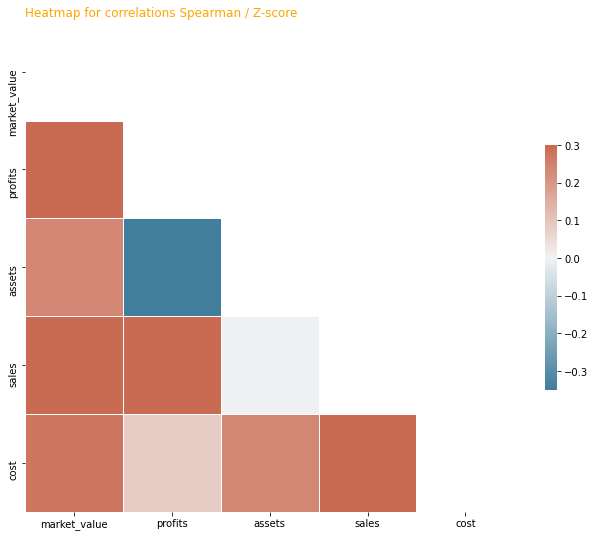

,market_value,profits,assets,sales,cost
market_value,1.000000,0.399096,0.236841,0.328839,0.276237
profits,0.399096,1.000000,-0.349133,0.450746,0.082210
assets,0.236841,-0.349133,1.000000,-0.002977,0.235342
sales,0.328839,0.450746,-0.002977,1.000000,0.852050
cost,0.276237,0.082210,0.235342,0.852050,1.000000


In [46]:
corrplot(zscore_num_corr_sp, 'Spearman / Z-score')
zscore_num_corr_sp

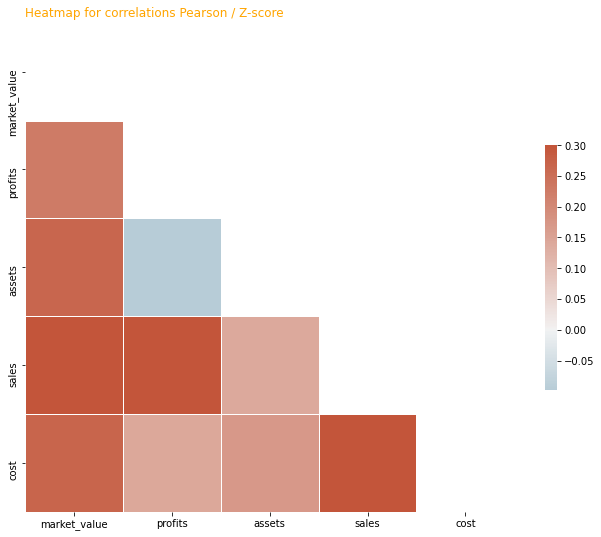

,market_value,profits,assets,sales,cost
market_value,1.000000,0.225987,0.264654,0.302346,0.267404
profits,0.225987,1.000000,-0.097147,0.353653,0.141645
assets,0.264654,-0.097147,1.000000,0.139325,0.170048
sales,0.302346,0.353653,0.139325,1.000000,0.976039
cost,0.267404,0.141645,0.170048,0.976039,1.000000


In [47]:
corrplot(zscore_num_corr_pe, 'Pearson / Z-score')
zscore_num_corr_pe

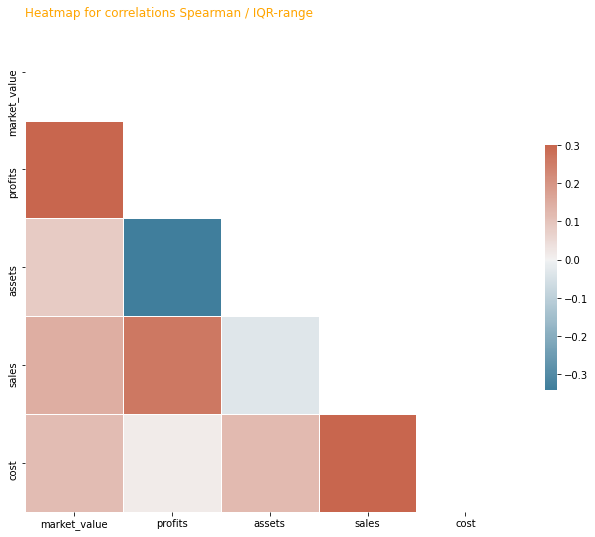

,market_value,profits,assets,sales,cost
market_value,1.000000,0.376975,0.084847,0.145309,0.112916
profits,0.376975,1.000000,-0.339543,0.263041,0.014668
assets,0.084847,-0.339543,1.000000,-0.033290,0.122089
sales,0.145309,0.263041,-0.033290,1.000000,0.937284
cost,0.112916,0.014668,0.122089,0.937284,1.000000


In [48]:
corrplot(iqr_num_corr_sp, 'Spearman / IQR-range')
iqr_num_corr_sp

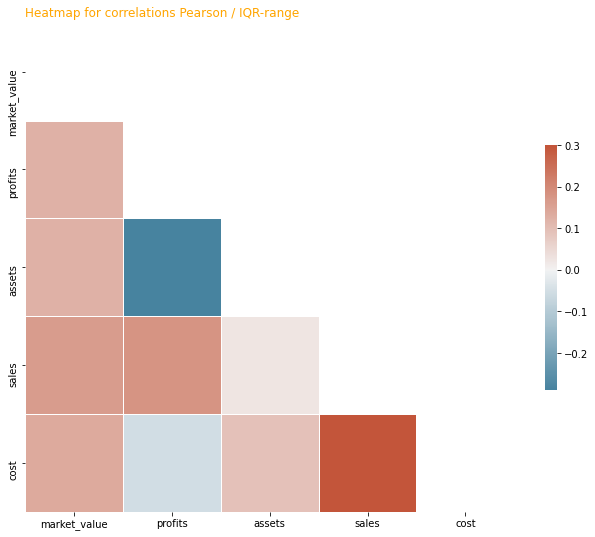

,market_value,profits,assets,sales,cost
market_value,1.000000,0.122631,0.122415,0.161965,0.135679
profits,0.122631,1.000000,-0.287647,0.179769,-0.051910
assets,0.122415,-0.287647,1.000000,0.025366,0.093179
sales,0.161965,0.179769,0.025366,1.000000,0.973051
cost,0.135679,-0.051910,0.093179,0.973051,1.000000


In [49]:
corrplot(iqr_num_corr_pe, 'Pearson / IQR-range')
iqr_num_corr_pe

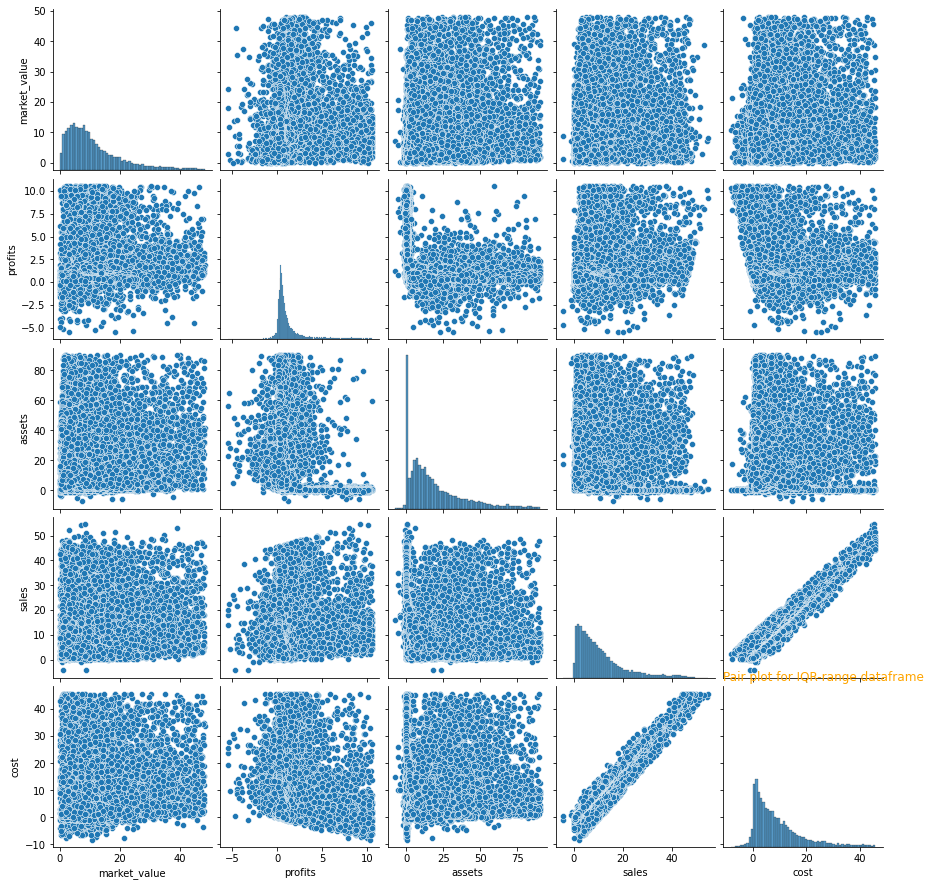

In [50]:
# Pair plot IQR dataframe
sns.pairplot(iqr_df)
plt.title(
    f'Pair plot for IQR-range dataframe',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.show()

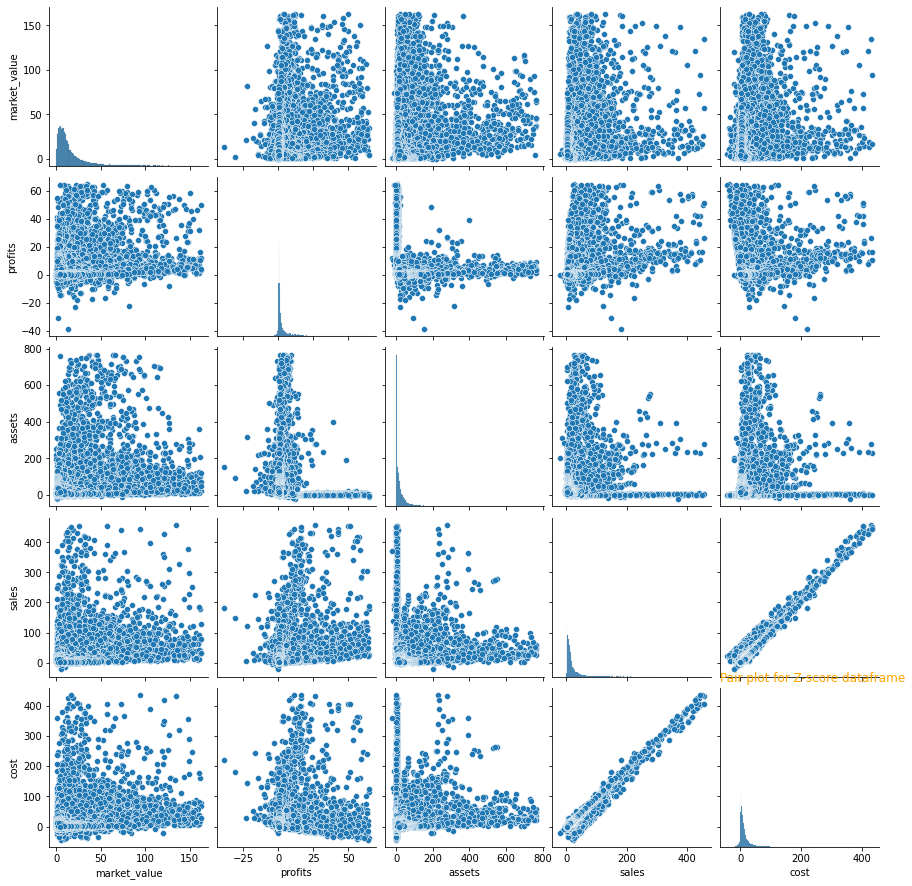

In [51]:
# Pair plot Z-score dataframe
sns.pairplot(zscore_df)
plt.title(
    f'Pair plot for Z-score dataframe',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)

plt.show()


In [52]:
# Las correlaciones son mus distintas. Seguro se debe a presencia de outliers.
# Spearman utiliza valores rankeados y brinda una mejor medida de correlacion.

In [53]:
clean_iqr_df = analysis_df
for col in outlier_cols:
    upper_limit = float(limits.loc[limits['metric'] == col].upper_limit.values[0])
    lower_limit = float(limits.loc[limits['metric'] == col].lower_limit.values[0])
    clean_iqr_df = clean_iqr_df[clean_iqr_df[col].between(lower_limit,upper_limit)]

clean_iqr_df

,company,industry,sector,country,continent,market_value,profits,assets,sales,rank,year,profits_%_assets,profits_%_sales,is_top_500,cost
132,caterpillar,heavy_equipment,industrials,united_states,north_america,45.13,3.5400,56.13,44.960,133,2008,0.063068,0.078737,True,41.4200
139,vivendi,telecommunications_services,telecommunication_services,france,europe,46.36,3.8300,63.73,31.620,140,2008,0.060097,0.121126,True,27.7900
145,mitsui,trading_companies,industrials,japan,asia,40.61,2.5700,83.21,41.540,146,2008,0.030886,0.061868,True,38.9700
152,kraft foods,food_processing,consumer_staples,united_states,north_america,47.79,2.5900,67.99,37.240,153,2008,0.038094,0.069549,True,34.6500
155,bt group,telecommunications_services,telecommunication_services,united_kingdom,europe,35.60,5.6100,47.32,39.810,156,2008,0.118555,0.140919,True,34.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25989,indorama ventures,specialized_chemicals,materials,thailand,asia,5.00,0.1377,12.70,11.400,1990,2020,0.010843,0.012079,False,11.2623
25990,l brands,apparel_footwear_retail,consumer_discretionary,united_states,north_america,3.30,-0.3663,10.10,12.900,1990,2020,-0.036267,-0.028395,False,13.2663
25992,diamondback energy,oil_gas_operations,energy,united_states,north_america,6.90,0.2400,23.50,4.000,1995,2020,0.010213,0.060000,False,3.7600
25993,founder securities,investment_services,financials,china,asia,8.30,0.1147,18.60,1.400,1995,2020,0.006167,0.081929,False,1.2853


In [54]:
clean_zscore_df = analysis_df
mask = (np.abs(stats.zscore(numeric_data)) >= 3)
clean_zscore_df = clean_zscore_df.loc[mask[mask.any(axis=1) == False].index]

In [55]:
# PLOT COMPANIES METRICS EVOLUTION BY YEAR
def plot_metrics_evolution(df):

    # Change the style of plot
    plt.style.use('seaborn-darkgrid')

    for col in ['sales', 'profits', 'assets', 'market_value', 'cost']:
        df\
            .groupby('year')[f'{col}']\
            .describe()['mean']\
            .plot(
                marker='',
                linewidth=1,
                alpha=0.9,
                label=f'{col}_mean'
            )

    # Add legend
    plt.legend(loc=2, ncol=2)

    # Add titles
    plt.title(
        f'Mean for sales, profits and assets grouped by year',
        loc='left',
        fontsize=12,
        fontweight=0,
        color='orange'
    )
    plt.xlabel('year')
    plt.ylabel('$usd billions')

    # Show the graph
    plt.show()

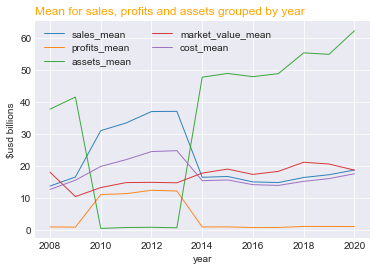

In [56]:
plot_metrics_evolution(clean_zscore_df)

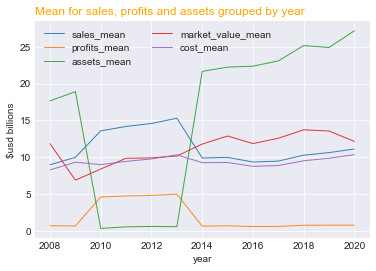

In [57]:
plot_metrics_evolution(clean_iqr_df)

In [58]:
def plot_boxplots_evolution(df):
    for col in ['sales', 'profits', 'assets', 'market_value', 'cost']:
        sns.boxplot(
            x='year',
            y=f'{col}',
            data=df
        )
        # Add titles
        plt.title(
            f'Boxplots for {col} grouped by year',
            loc='left',
            fontsize=12,
            fontweight=0,
            color='orange'
        )
        plt.xlabel('year')
        plt.ylabel('$usd billions')
        plt.show()

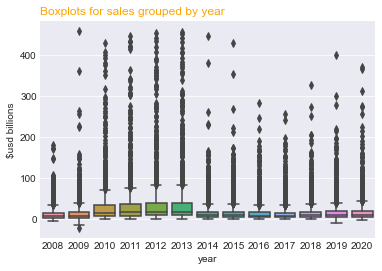

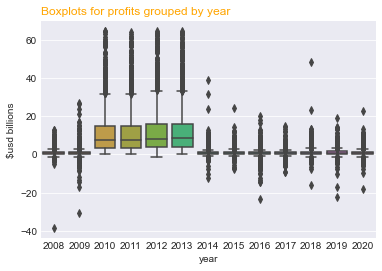

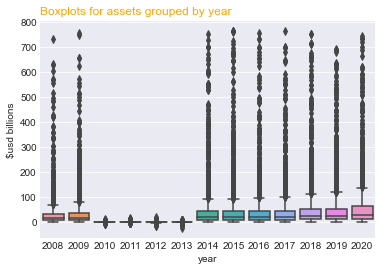

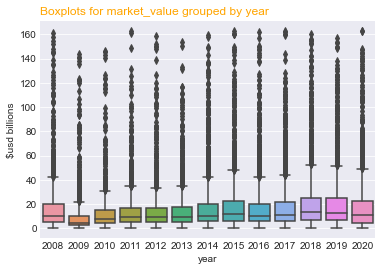

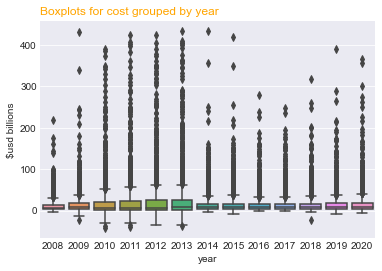

In [59]:
plot_boxplots_evolution(clean_zscore_df)

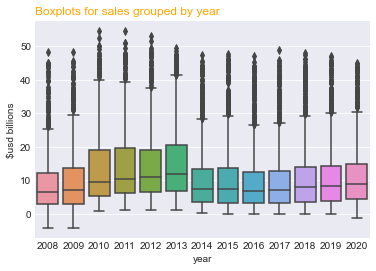

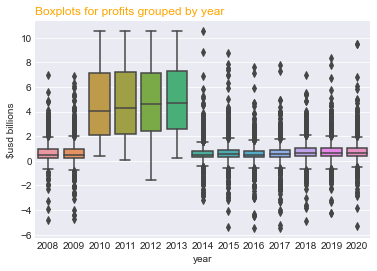

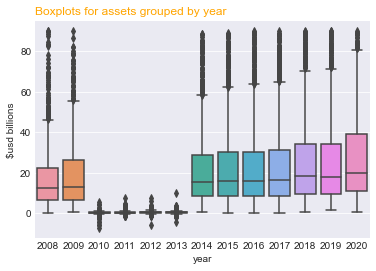

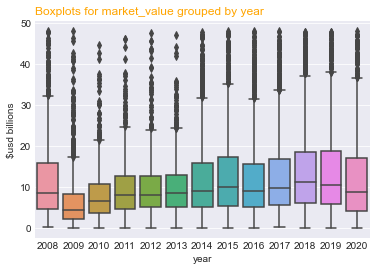

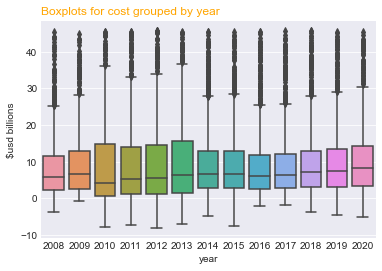

In [60]:
plot_boxplots_evolution(clean_iqr_df)

In [61]:
output_columns = [
    'company',
    'industry',
    'sector',
    'country',
    'continent',
    'market_value',
    'profits',
    'assets',
    'sales',
    'cost',
    'rank',
    'year'
]

In [62]:
analysis_df[output_columns].to_csv('../data/forbes_2000_all_in_one_no_duplicates.csv', index=False, header=True)

In [63]:
clean_zscore_df[output_columns].to_csv('../data/forbes_2000_cleaned_outliers_z_score.csv', index=False, header=True)

In [64]:
clean_iqr_df[output_columns].to_csv('../data/forbes_2000_cleaned_outliers_iqr_range.csv', index=False, header=True)